In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline


In [17]:
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'z': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

In [18]:
df

,x,z
0,12,39
1,20,36
2,28,30
3,18,52
4,29,54
5,33,46
6,24,55
7,45,59
8,45,63
9,52,70


In [19]:
df.to_csv("df.csv")

In [14]:
import os 

In [15]:
os.chdir("C:\\Users\\Admin\\Desktop\\Training\\DSP31\\Python\\Clustering")

In [4]:
data=pd.read_csv("C:\\Users\\Admin\\Desktop\\Training\\Imerticus\\Clustering\\Dataset\\Dataset\\snsdata.csv")

In [5]:
pd.set_option('display.max_rows',100)

In [6]:
pd.set_option("display.max_rows",100)

In [7]:
pd.set_option("display.max_rows", 999)

In [8]:
data

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
np.random.seed(200)
k =3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}  

In [5]:
centroids

{1: [26, 16], 2: [68, 42], 3: [55, 76]}

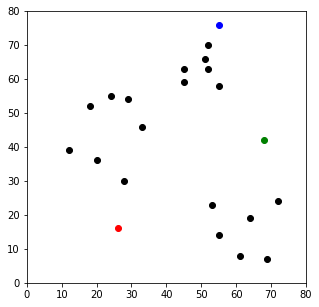

In [21]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['z'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [12]:
centroids[1] ={1: [26, 16], 2: [68, 42], 3: [55, 76]}

[23.428571428571427, 44.57142857142857]

     x   z  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        26.925824        56.080300        56.727418        1     r
1   20  36        20.880613        48.373546        53.150729        1     r
2   28  30        14.142136        41.761226        53.338541        1     r
3   18  52        36.878178        50.990195        44.102154        1     r
4   29  54        38.118237        40.804412        34.058773        3     b
5   33  46        30.805844        35.227830        37.202150        1     r
6   24  55        39.051248        45.880279        37.443290        3     b
7   45  59        47.010637        28.600699        19.723083        3     b
8   45  63        50.695167        31.144823        16.401219        3     b
9   52  70        59.933296        32.249031         6.708204        3     b
10  51  66        55.901699        29.410882        10.770330        3     b
11  52  63        53.712196        26.400758        13.341664        3     b

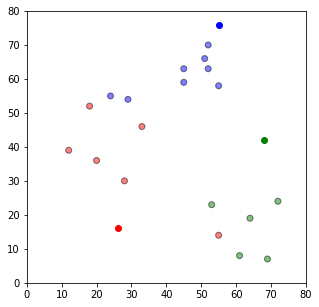

In [22]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt((df['x'] - centroids[i][0]) ** 2 #(26,16)
                + (df['z'] - centroids[i][1]) ** 2))
#         {1: [26, 16], 2: [68, 42], 3: [55, 76]}
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df)

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['z'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [14]:
centroids

{1: [26, 16], 2: [68, 42], 3: [55, 76]}

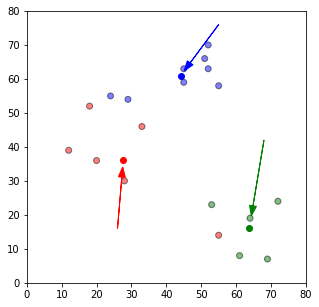

In [8]:
## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['z'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['z'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

In [18]:
centroids

{1: [27.666666666666668, 36.166666666666664],
 2: [63.8, 16.2],
 3: [44.125, 61.0]}

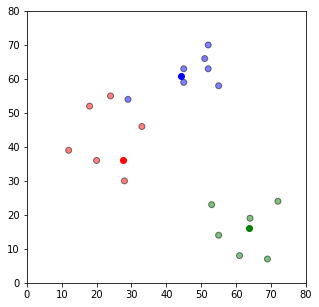

In [9]:
df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['z'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [10]:
df

,x,z,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,15.920811,56.595760,38.936045,1,r
1,20,36,7.668478,48.067453,34.742130,1,r
2,28,30,6.175669,38.367695,34.943034,1,r
3,18,52,18.550981,58.131575,27.631786,1,r
4,29,54,17.883108,51.379763,16.666302,3,b
5,33,46,11.186549,42.856505,18.675268,1,r
6,24,55,19.186946,55.583091,21.000372,1,r
7,45,59,28.667151,46.746979,2.183031,3,b
8,45,63,31.944831,50.434909,2.183031,3,b
9,52,70,41.674999,55.078853,11.958914,3,b


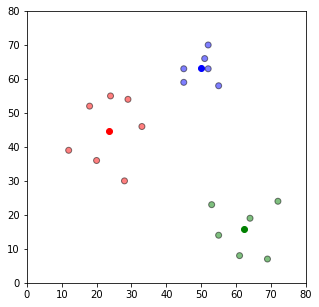

1


In [11]:
count=0
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        count=count+1
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['z'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()
print(count)

In [29]:
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})


In [28]:
from sklearn.cluster import KMeans
kmean_model=KMeans(n_clusters=3, random_state=88)

In [26]:
help(KMeans)

Help on class KMeans in module sklearn.cluster.k_means_:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
 |  
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (rows) at random from data for
 |      the initial centro

In [30]:
kmean_model.fit(df)  # training kmeans model on df data frame

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=88, tol=0.0001, verbose=0)

In [32]:
kmean_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1])

In [33]:
kmean_model.predict(df)

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1])

In [28]:
labels = kmeans_model.predict(df)
centroids = kmeans_model.cluster_centers_

In [29]:
labels

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [30]:
centroids

array([[62.33333333, 15.83333333],
       [23.42857143, 44.57142857],
       [50.        , 63.16666667]])

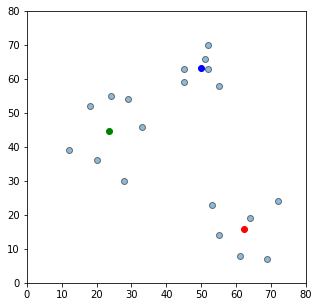

In [31]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'],  alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [37]:
kmeans_model.inertia_

1624.4285714285716

In [32]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

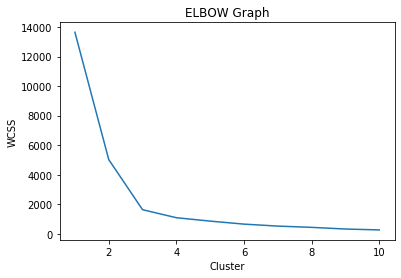

In [33]:
plt.plot(range(1,11),wcss)
plt.xlabel("Cluster")
plt.ylabel("WCSS")
plt.title("ELBOW Graph")
plt.show()

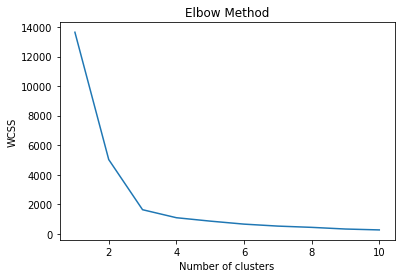

In [34]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
dir(kmeans)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_transform',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_init',
 'n_iter_',
 'n_jobs',
 'precompute_distances',
 'predict',
 'random_state',
 'score',
 'set_params',
 'tol',
 'transform',
 'verbose']